1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (20, 4)
   Classes créées : 0 / 1 (binarisation sur la variable 'Chins')

3. Introduction de valeurs manquantes...

   Valeurs manquantes ajoutées : 3

4. Nettoyage...

   NaN imputés avec la moyenne.
   Valeurs manquantes restantes = 0

5. Analyse Exploratoire (EDA)...

   Statistiques descriptives :
           Chins      Situps       Jumps
count  20.000000   20.000000   20.000000
mean    9.684211  147.421053   72.000000
std     5.181471   62.004512   50.710738
min     1.000000   50.000000   25.000000
25%     5.500000  101.000000   40.000000
50%    11.500000  136.210526   59.000000
75%    13.250000  210.000000   85.250000
max    17.000000  251.000000  250.000000 



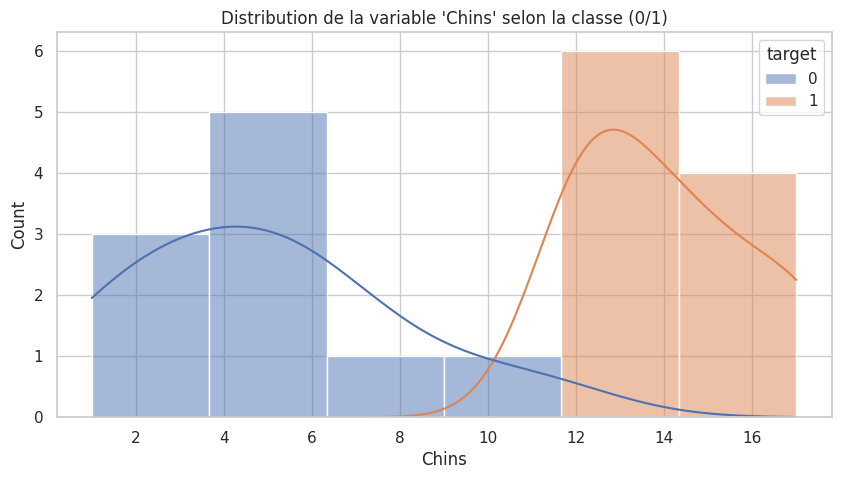

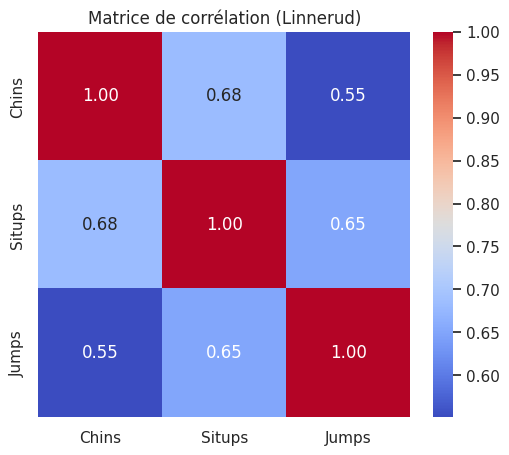

6. Séparation effectuée :
   Train : 16 échantillons
   Test  : 4 échantillons

7. Entraînement du modèle RandomForest...

   Modèle entraîné.

8. Évaluation...

   Accuracy : 50.00%

   Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4
 



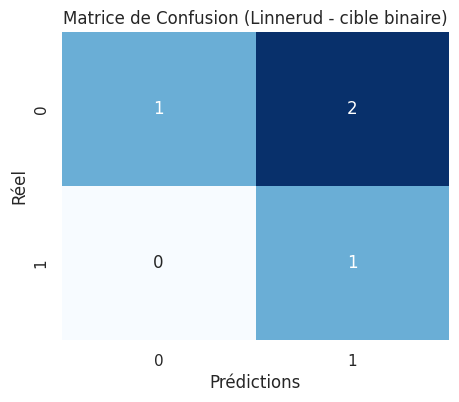


--- FIN DU SCRIPT ---


In [19]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE - LINNERUD)
# Auteur : Votre Professeur IA
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
data = load_linnerud()

# Features dans un DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Création d'une cible binaire à partir de la colonne "Chins"
df["target"] = (df["Chins"] > df["Chins"].median()).astype(int)

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print("   Classes créées : 0 / 1 (binarisation sur la variable 'Chins')\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE DONNÉES SALES
# ------------------------------------------------------------------------------
print("3. Introduction de valeurs manquantes...\n")

np.random.seed(42)
df_dirty = df.copy()

# On ajoute des NaN dans 5% des lignes pour chaque feature (sauf target)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Valeurs manquantes ajoutées : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE DES DONNÉES
# ------------------------------------------------------------------------------
print("4. Nettoyage...\n")

# Séparation X / y avant imputation
X = df_dirty.drop("target", axis=1)
y = df_dirty["target"]

# Imputation par la moyenne
imputer = SimpleImputer(strategy="mean")
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("   NaN imputés avec la moyenne.")
print(f"   Valeurs manquantes restantes = {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE
# ------------------------------------------------------------------------------
print("5. Analyse Exploratoire (EDA)...\n")

print("   Statistiques descriptives :")
print(X_clean.describe(), "\n")

# Histogramme d'une variable clé
plt.figure(figsize=(10, 5))
df_clean = df.copy()
sns.histplot(data=df_clean, x="Chins", hue="target", kde=True)
plt.title("Distribution de la variable 'Chins' selon la classe (0/1)")
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(6, 5))
sns.heatmap(X_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation (Linnerud)")
plt.show()

# ------------------------------------------------------------------------------
# 6. SPLIT TRAIN / TEST
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print("6. Séparation effectuée :")
print(f"   Train : {X_train.shape[0]} échantillons")
print(f"   Test  : {X_test.shape[0]} échantillons\n")

# ------------------------------------------------------------------------------
# 7. MODELE : RANDOM FOREST
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle RandomForest...\n")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION
# ------------------------------------------------------------------------------
print("8. Évaluation...\n")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"   Accuracy : {acc*100:.2f}%\n")

print("   Rapport de classification :")
print(classification_report(y_test, y_pred), "\n")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion (Linnerud - cible binaire)")
plt.show()

print("\n--- FIN DU SCRIPT ---")
